In [1]:
from tensorflow import keras
import pathlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras import utils
import tensorflow

In [2]:
model = keras.models.load_model('maski')

In [3]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 separable_conv2d_12 (Separa  (None, 256, 256, 64)     331       
 bleConv2D)                                                      
                                                                 
 separable_conv2d_13 (Separa  (None, 256, 256, 64)     5760      
 bleConv2D)                                                      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 128, 128, 64)     0         
 2D)                                                             
                                                                 
 batch_normalization_6 (Batc  (None, 128, 128, 64)     256       
 hNormalization)                                                 
                                                                 
 separable_conv2d_14 (Separa  (None, 128, 128, 64)    

In [4]:
import PIL

In [48]:
with_mask = PIL.Image.open('ipDk9kpTURBXy84YzY3YTYxOGM4OTQ0MjVmN2RmYWI5MzAzNjliNmY4Zi5qcGeSlQMBzM_NB9DNBGaTBc0EsM0Chd4AAaEwAQ.jpg').resize( (256,256) )

without_mask = PIL.Image.open('President_of_Poland_Andrzej_Duda_Full_Resolution_(cropped).jpg').resize( (256,256) )

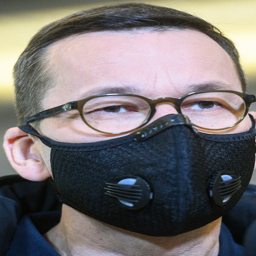

In [49]:
with_mask

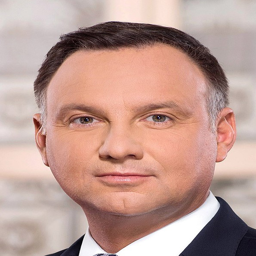

In [50]:
without_mask

In [51]:
without_mask = np.array(without_mask)
with_mask = np.array(with_mask)

without_mask = tensorflow.expand_dims(without_mask, 0)
with_mask = tensorflow.expand_dims(with_mask, 0)

In [52]:
pred_without = model.predict(without_mask)
pred_with = model.predict(with_mask)

1/1 [==============================] - 0s 52ms/step


In [53]:
print('Prediction without mask', np.argmax(pred_without, axis = 1))
print('Prediction with mask', np.argmax(pred_with, axis = 1))

Prediction without mask [2]
Prediction with mask [1]


Corresponding labels are:

0 -- mask put on incorrectly

1 -- with mask 

2 -- without mask